# 1.Import neccessary libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# 2.ETL data from Kaggle

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Final Project Da/healthcare-dataset-stroke-data.csv')

## 2.1. Check information data and describe

In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Based on the stroke data, this data contain 5110 values with total 12 columns on the database with 3 dtypes: float64, int64, and object.



# 2.2.Check how many this data have null value

In [20]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


According to the sumary result, in Bmi column, it only have 4909 values that means it has a null value to execute and replace.

# 2.3. Replace null value in bmi

In [21]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)
df.isnull().sum()

/tmp/ipython-input-3225364899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_mean, inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


# 2.4. Drop duplicate values in database

In [22]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 3. General EDA for database

# 3.1. Check the distribution of numeric column in the database

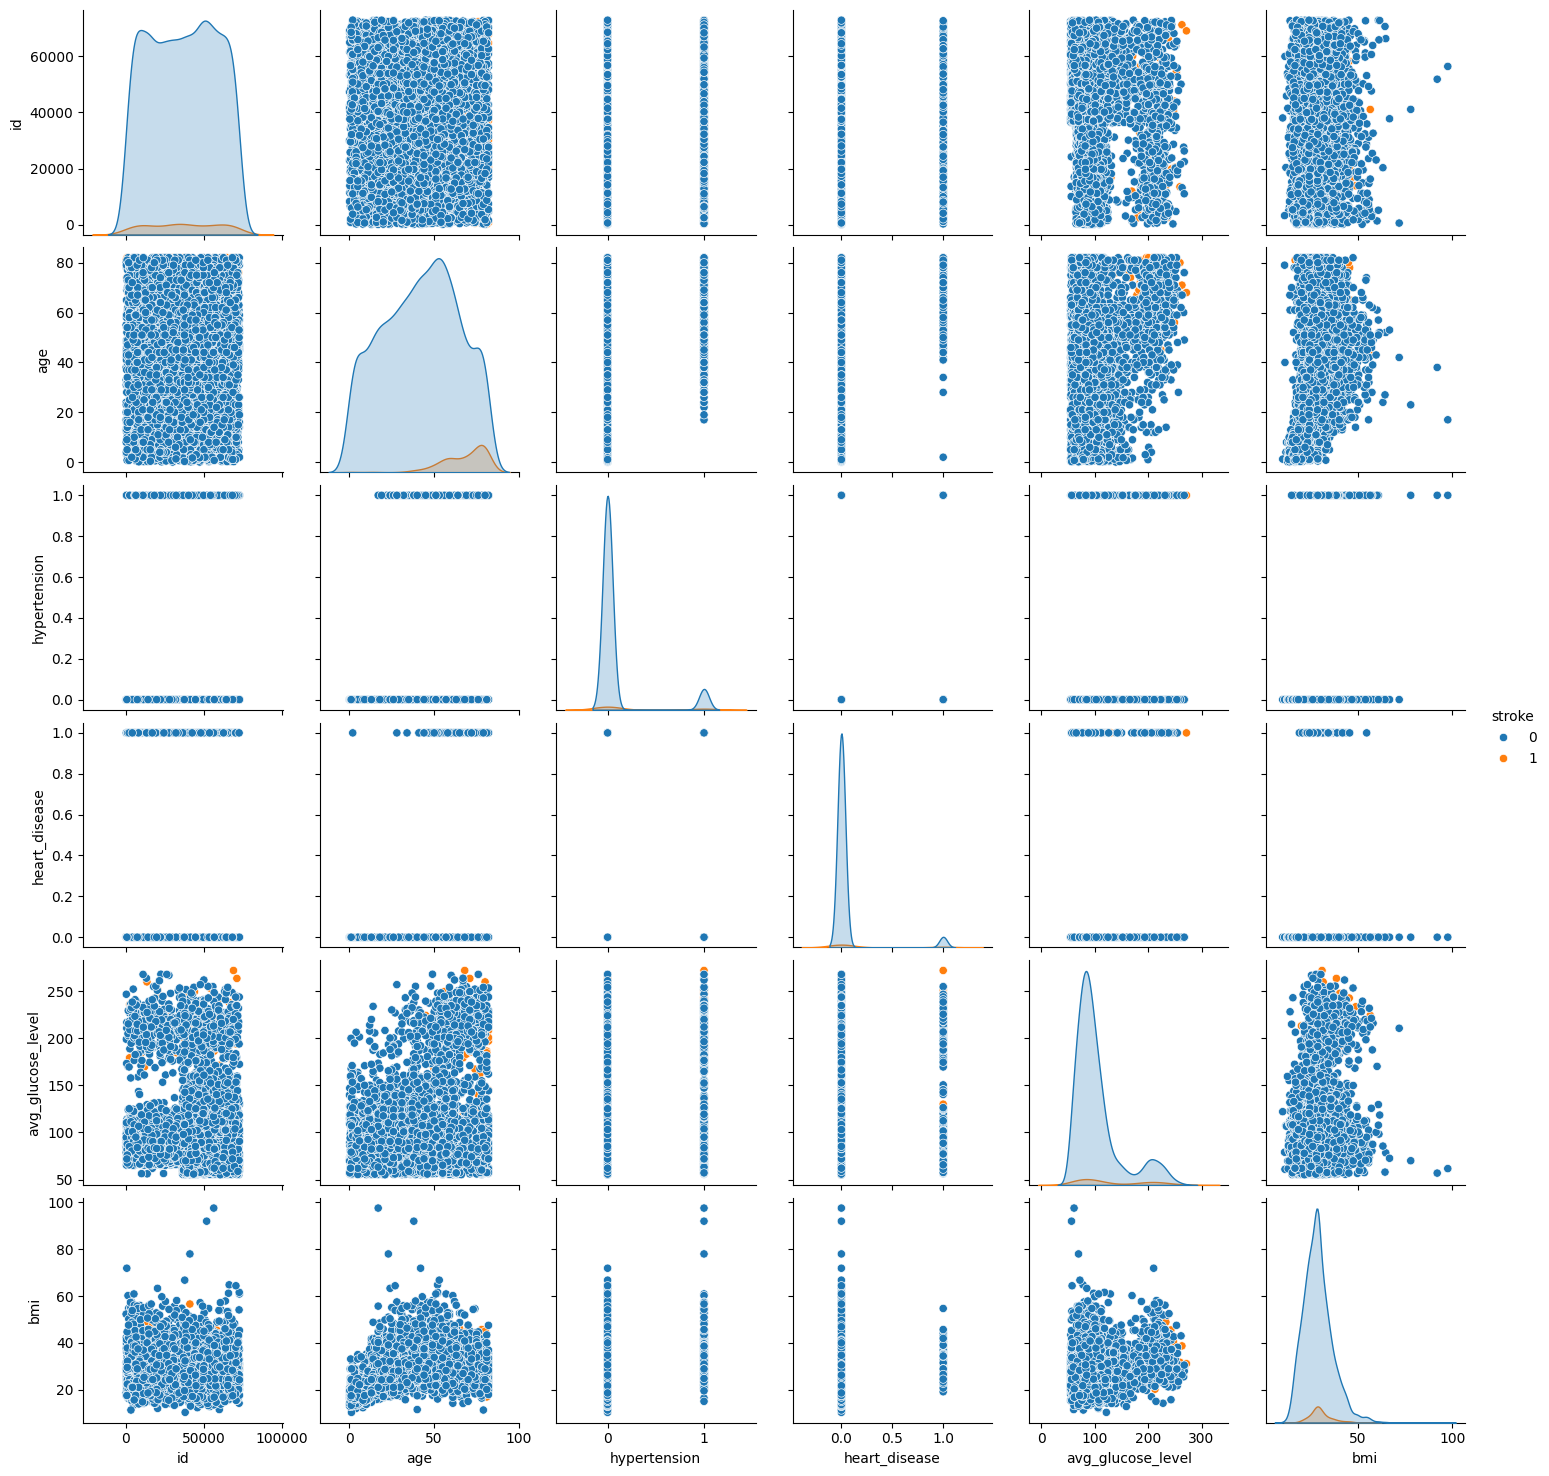

In [23]:
sns.pairplot(df, hue='stroke')


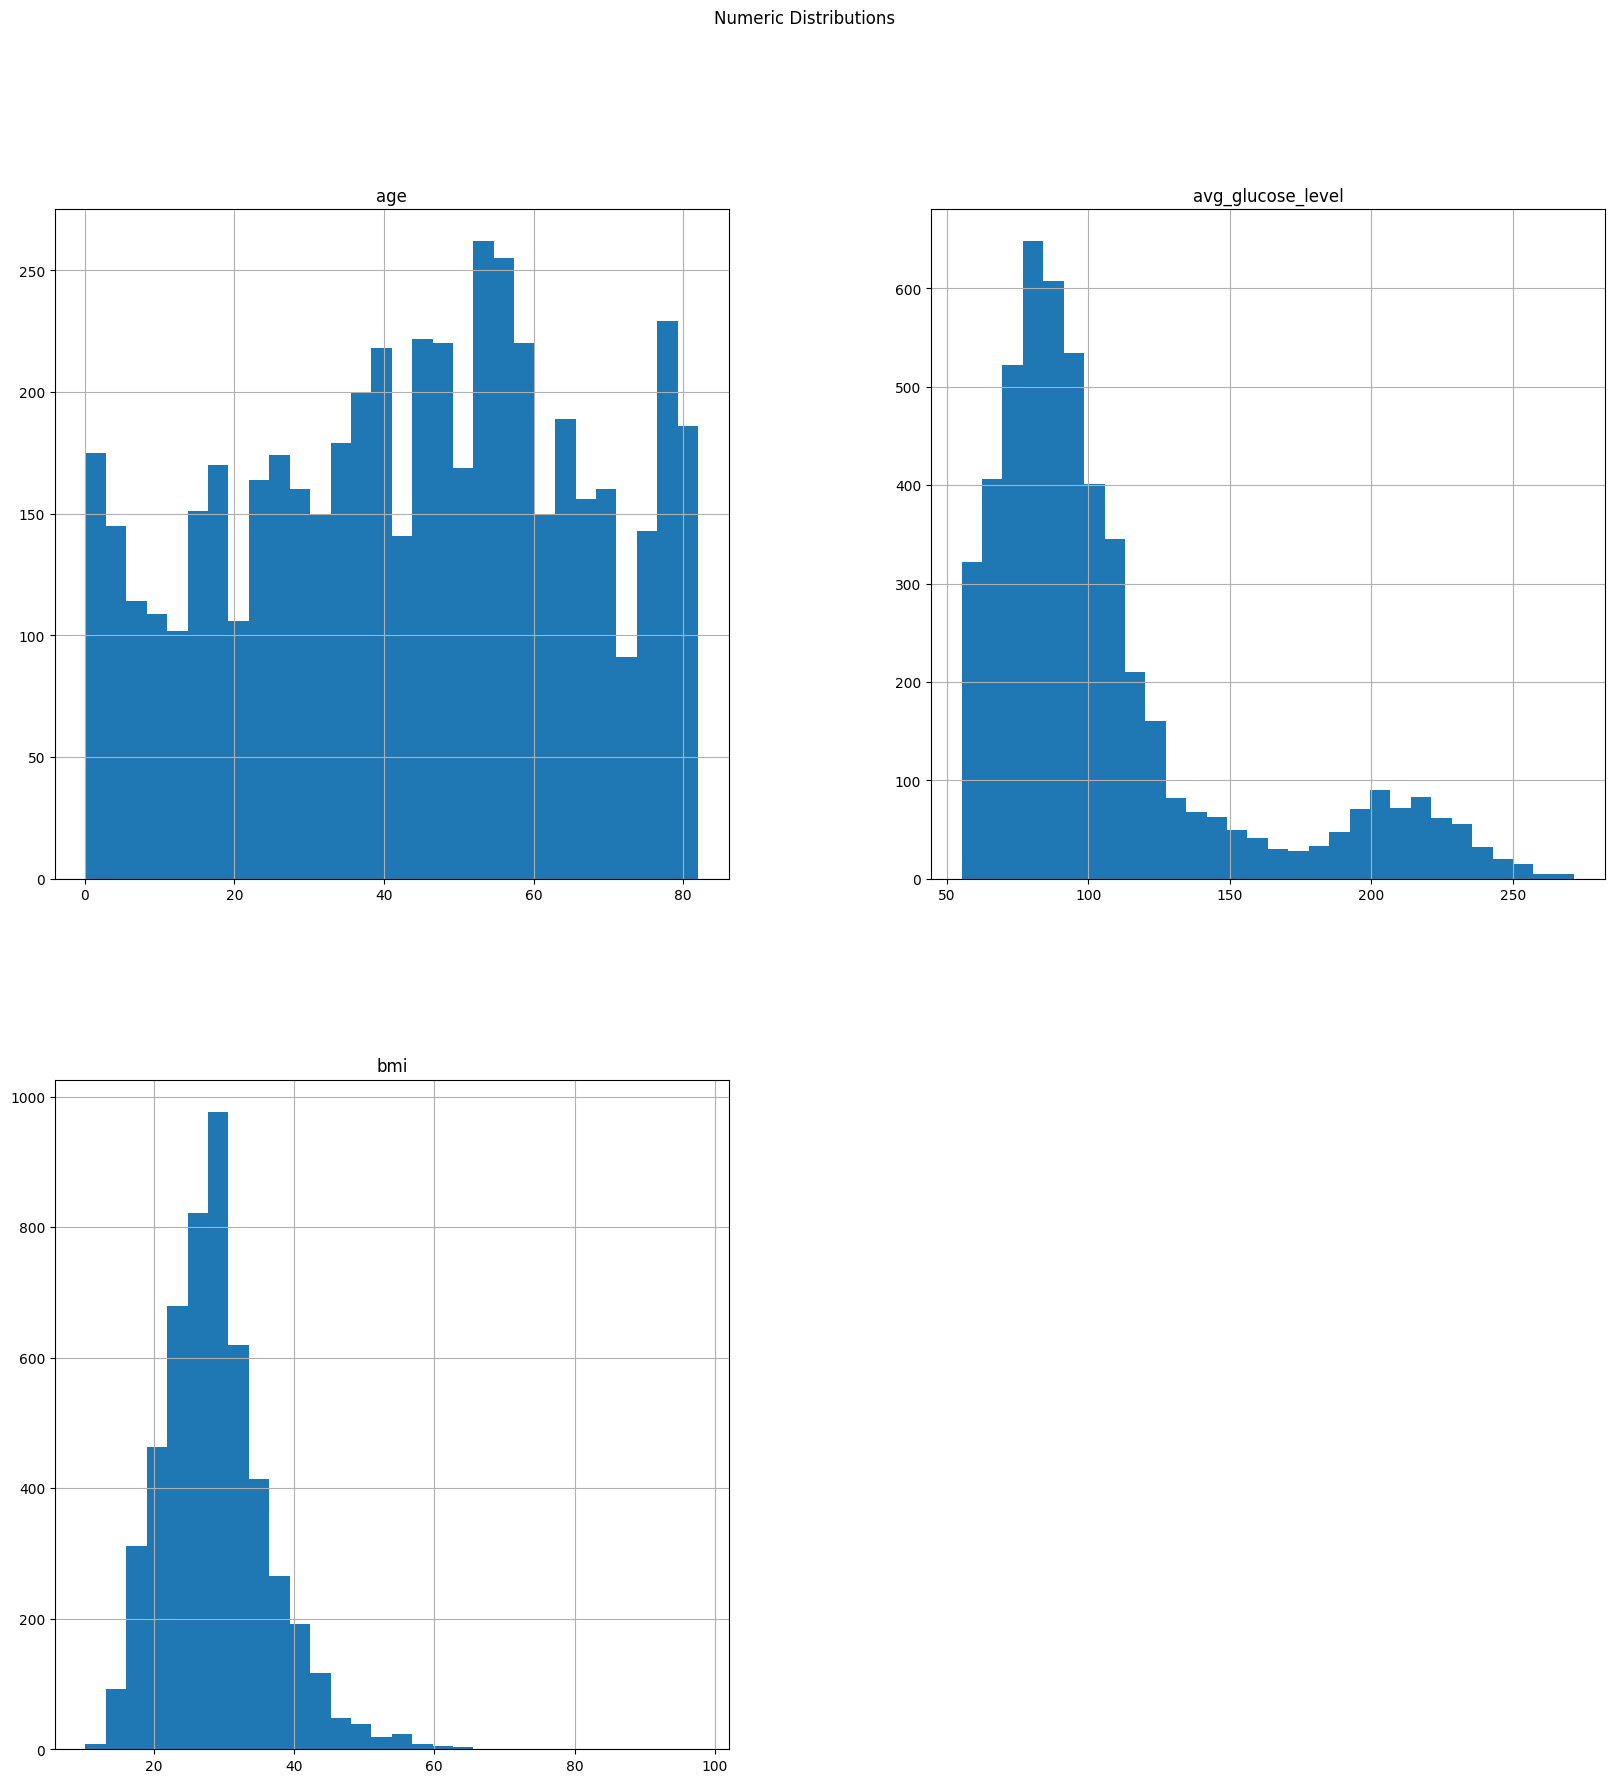

In [24]:
num_cols = ["age","avg_glucose_level","bmi"]
df[num_cols].hist(figsize=(20,20), bins=30)
plt.suptitle("Numeric Distributions")
plt.show()

Data values were distributed normally

# 4.Create suitable group for some columns



In [25]:
df['smoke_group'] = df['smoking_status'].map(
    lambda x: 'smoking' if x in ['smokes', 'formerly_smoked'] else 'non_smoke')

In [26]:
def bmi_category(a):
    if a <= 18.5:
        return "Underweight"
    elif 18.5 <= a <= 24.9:
        return 'Normal'
    elif 24.9 <= a <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi'] = df['bmi'].apply(bmi_category)

In [27]:
def glucose_category(b):
    if 0<= b <= 70:
        return "Low"
    elif 70 <= b <= 100:
        return 'Normal'
    elif 100 <= b <= 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['avg_glucose_level'] = df['avg_glucose_level'].apply(glucose_category)

In [28]:
def age_category(c):
    if 0<= c <= 17:
        return "young"
    elif 18 <= c <= 24:
        return 'teenager'
    elif 25 <= c <= 64:
        return 'aldult'
    else:
        return 'old'

df['age'] = df['age'].apply(age_category)

# 4.1.Convert categorical data to numeric

In [29]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoke_group', 'ever_married','Residence_type','work_type','bmi','avg_glucose_level','age'])
print(df_encoded)

         id  hypertension  heart_disease   smoking_status  stroke  \
0      9046             0              1  formerly smoked       1   
1     51676             0              0     never smoked       1   
2     31112             0              1     never smoked       1   
3     60182             0              0           smokes       1   
4      1665             1              0     never smoked       1   
...     ...           ...            ...              ...     ...   
5105  18234             1              0     never smoked       0   
5106  44873             0              0     never smoked       0   
5107  19723             0              0     never smoked       0   
5108  37544             0              0  formerly smoked       0   
5109  44679             0              0          Unknown       0   

      gender_Female  gender_Male  gender_Other  smoke_group_non_smoke  \
0             False         True         False                   True   
1              True      

# 4.2.Drop unecessary column to make the data simple and easy to analys

In [30]:
drop_columns = ['gender_Female', 'gender_Other','smoking_status']
df_encoded.drop(columns=['id']+ drop_columns, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   hypertension                   5110 non-null   int64
 1   heart_disease                  5110 non-null   int64
 2   stroke                         5110 non-null   int64
 3   gender_Male                    5110 non-null   bool 
 4   smoke_group_non_smoke          5110 non-null   bool 
 5   smoke_group_smoking            5110 non-null   bool 
 6   ever_married_No                5110 non-null   bool 
 7   ever_married_Yes               5110 non-null   bool 
 8   Residence_type_Rural           5110 non-null   bool 
 9   Residence_type_Urban           5110 non-null   bool 
 10  work_type_Govt_job             5110 non-null   bool 
 11  work_type_Never_worked         5110 non-null   bool 
 12  work_type_Private              5110 non-null   bool 
 13  work_type_Self-emp

# 4.3. Change suitable type for data

In [31]:

exclude_cols= ['hypertension','heart_disease']
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   hypertension                   5110 non-null   int64
 1   heart_disease                  5110 non-null   int64
 2   stroke                         5110 non-null   int64
 3   gender_Male                    5110 non-null   int64
 4   smoke_group_non_smoke          5110 non-null   int64
 5   smoke_group_smoking            5110 non-null   int64
 6   ever_married_No                5110 non-null   int64
 7   ever_married_Yes               5110 non-null   int64
 8   Residence_type_Rural           5110 non-null   int64
 9   Residence_type_Urban           5110 non-null   int64
 10  work_type_Govt_job             5110 non-null   int64
 11  work_type_Never_worked         5110 non-null   int64
 12  work_type_Private              5110 non-null   int64
 13  work_type_Self-emp

In [32]:
print(df_encoded)

      hypertension  heart_disease  stroke  gender_Male  smoke_group_non_smoke  \
0                0              1       1            1                      1   
1                0              0       1            0                      1   
2                0              1       1            1                      1   
3                0              0       1            0                      0   
4                1              0       1            0                      1   
...            ...            ...     ...          ...                    ...   
5105             1              0       0            0                      1   
5106             0              0       0            0                      1   
5107             0              0       0            0                      1   
5108             0              0       0            1                      1   
5109             0              0       0            0                      1   

      smoke_group_smoking  

# 5. General Analysis data


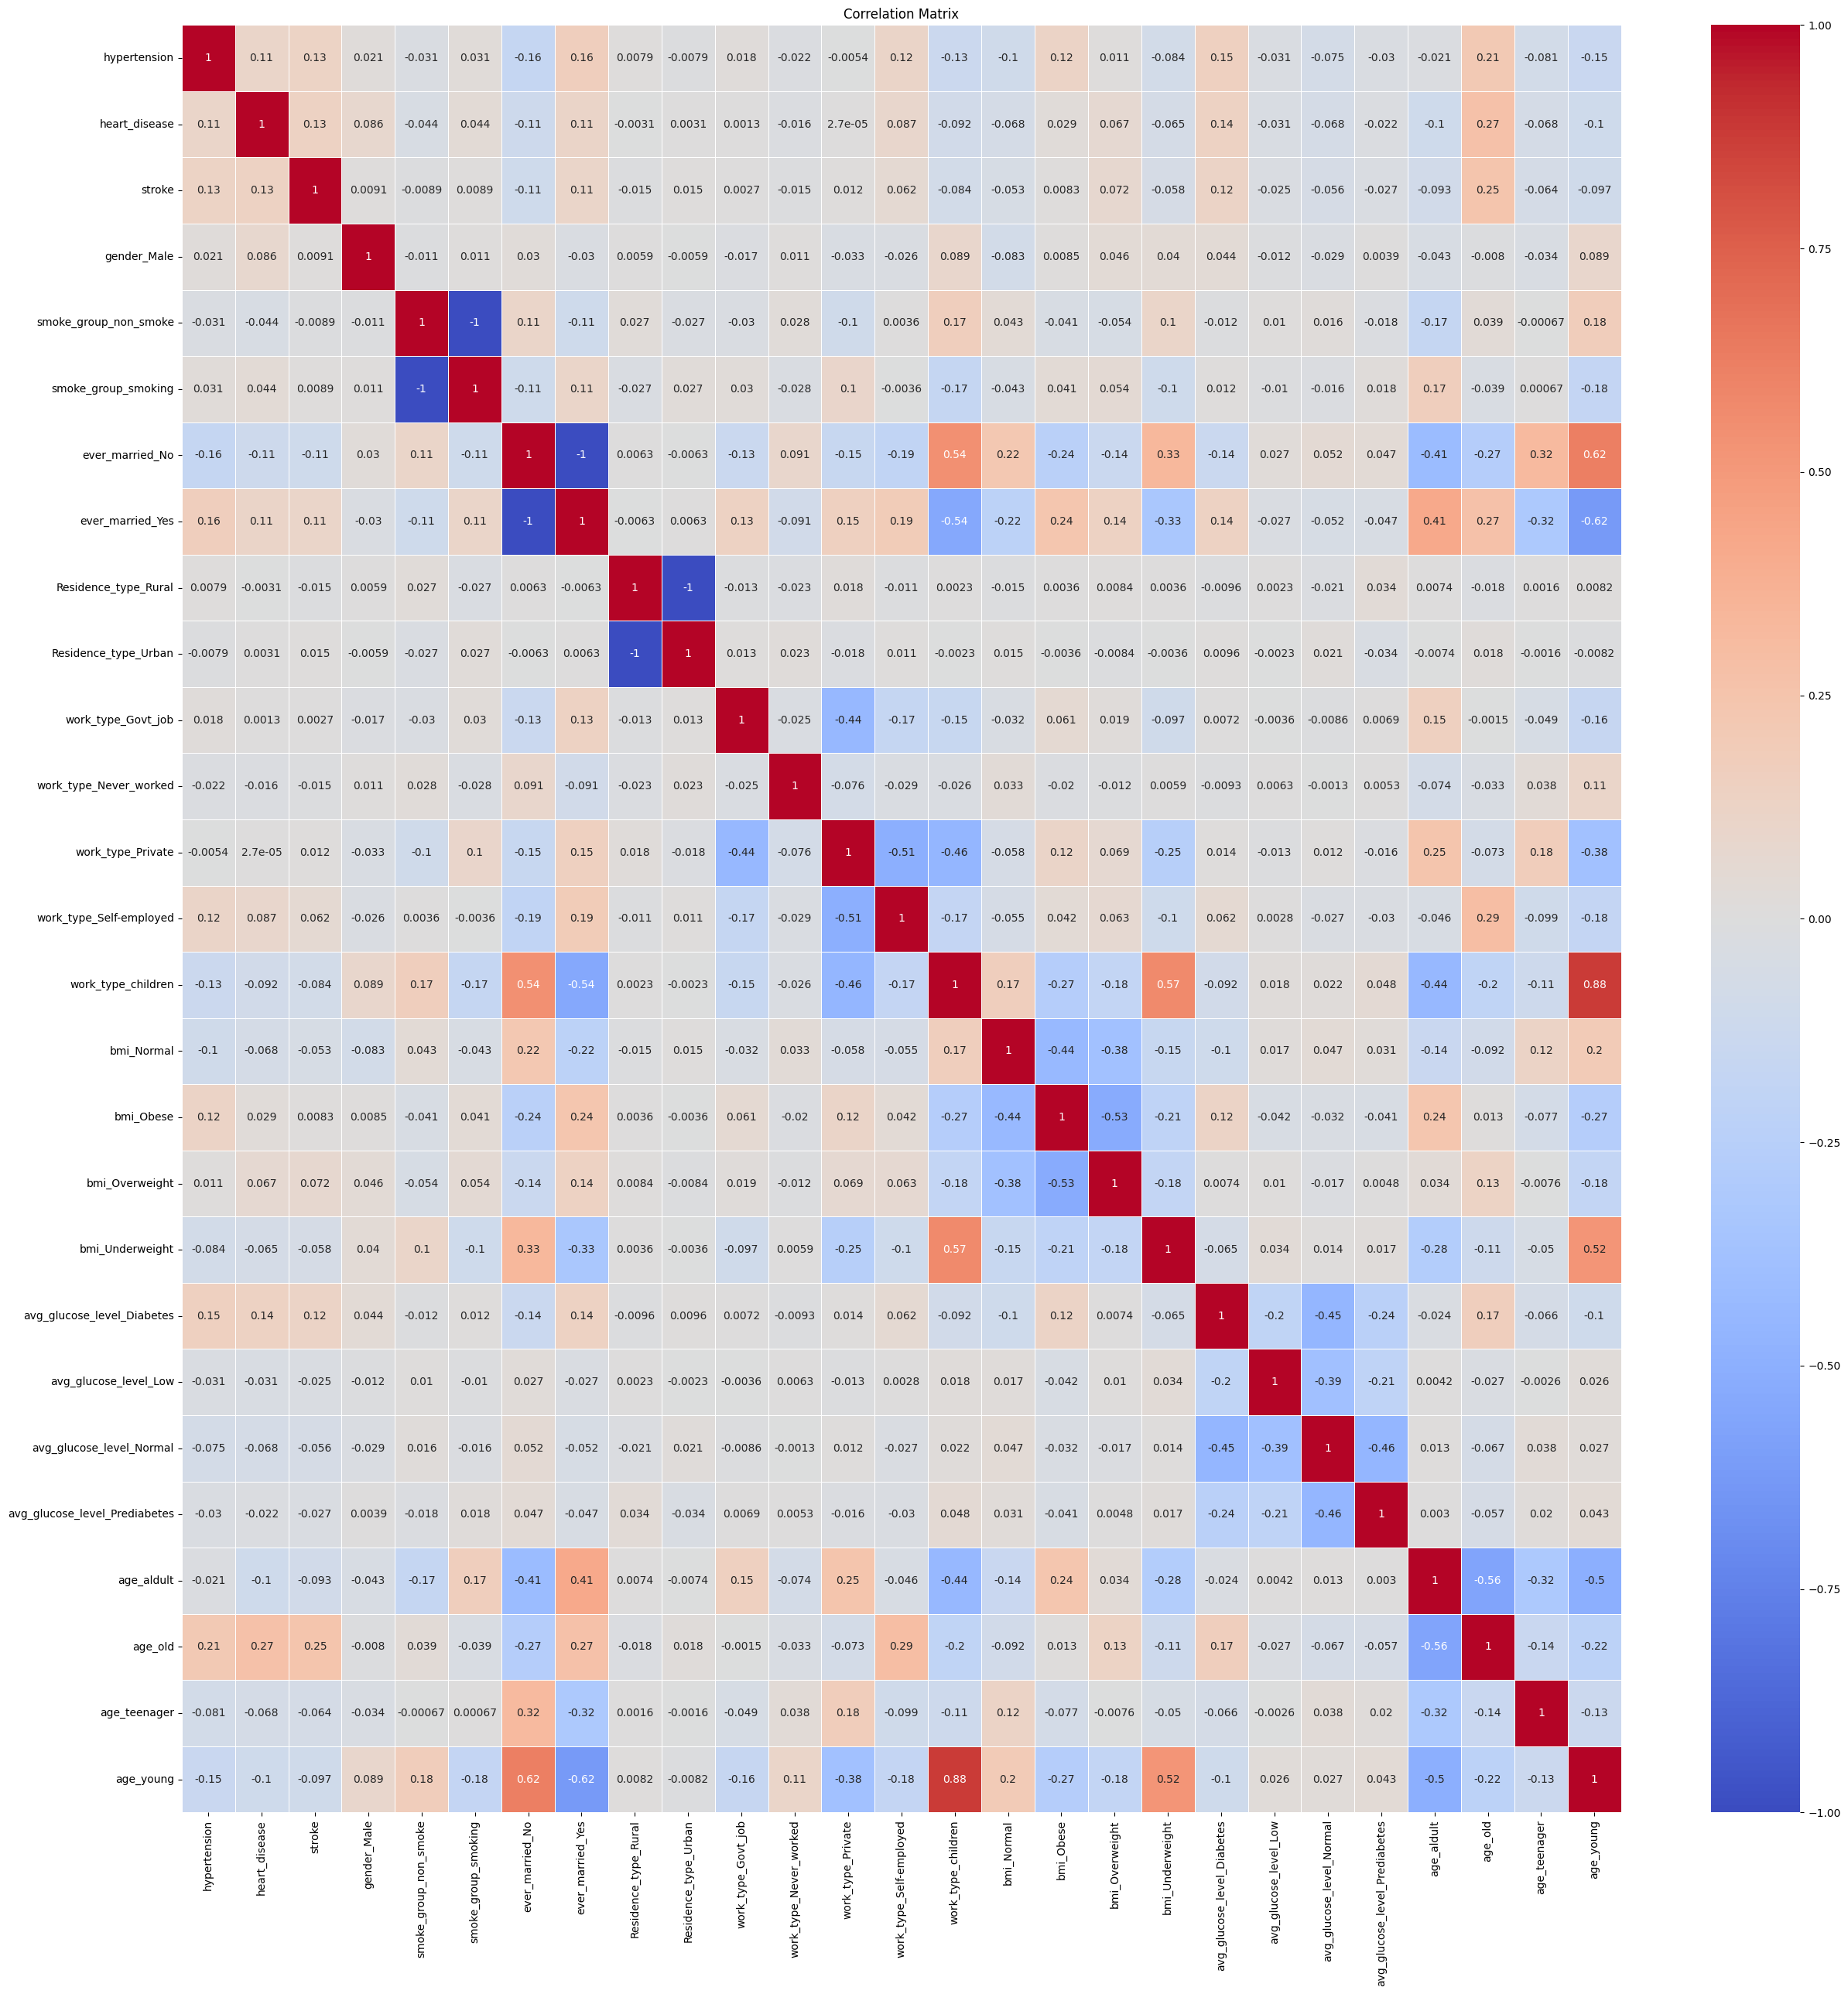

In [33]:
correlation_matrix = df_encoded.corr()
correlation_matrix
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Heatmap represent the relationship of each values in the datamodels. We can see Stroke have protpotional to old, diabetes, overweight, smoking, hypertension and heart disease. That means this type affect and can lead to stroke easily.

Built Regression model

In [35]:
y_cols = ['stroke']
x = df_encoded.drop(columns=y_cols)
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     22.37
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           6.18e-75
Time:                        12:43:29   Log-Likelihood:                 801.71
No. Observations:                5110   AIC:                            -1563.
Df Residuals:                    5090   BIC:                            -1433.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In Linear regression, we can see in gender Male have the P-value > 0.05 so that gender Male need to drop out the database

In [37]:
y_cols = ['stroke', 'gender_Male']
x = df_encoded.drop(columns=y_cols)
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     23.17
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           4.34e-74
Time:                        12:44:27   Log-Likelihood:                 798.01
No. Observations:                5110   AIC:                            -1558.
Df Residuals:                    5091   BIC:                            -1434.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [38]:
df_encoded.to_csv("final_project_output.csv", index=False, encoding="utf-8")
df.to_csv("stroke_predict.csv", index=False, encoding="utf-8")


Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x = df_encoded.drop(columns=['stroke'])
y = df_encoded['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
mode = model.predict(x_test)
accuracy = accuracy_score(y_test, mode)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, mode))

Accuracy: 0.9363992172211351
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.61      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

